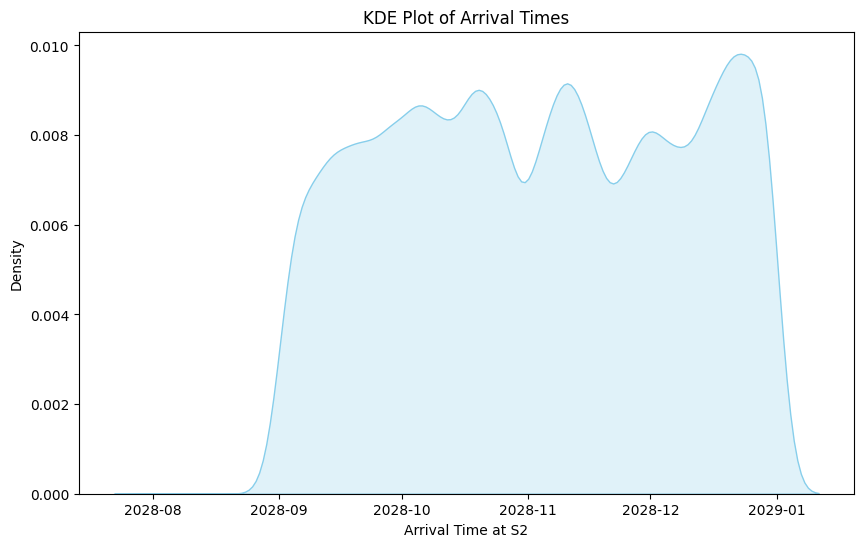

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("./data-p3/BASA_AUC_2028_912.csv")
df2 = pd.read_csv("./data-p3/dat_P_sub_c.csv")

df['S2'] = pd.to_datetime(df['S2'])
plt.figure(figsize=(10, 6))
sns.kdeplot(df['S2'], fill=True, color='skyblue')
plt.xlabel('Arrival Time at S2')
plt.ylabel('Density')
plt.title('KDE Plot of Arrival Times')
plt.show()

In [12]:
df['Wait_Time'] = pd.to_timedelta(df['Wait_Time'], unit='s')

df['S1_estimated'] = df['S2'] - df['Wait_Time']

df = df.dropna(subset=['S1_estimated'])

plt.figure(figsize=(10, 6))
sns.kdeplot(df['S1_estimated'].dt.hour, shade=True, color='skyblue')
plt.xlabel('Adjusted Hour of Arrival')
plt.ylabel('Density')
plt.title('KDE Plot of Adjusted Arrival Times by Hour')
plt.show()

OutOfBoundsTimedelta: Cannot convert 14000000000 seconds to timedelta64[ns] without overflow

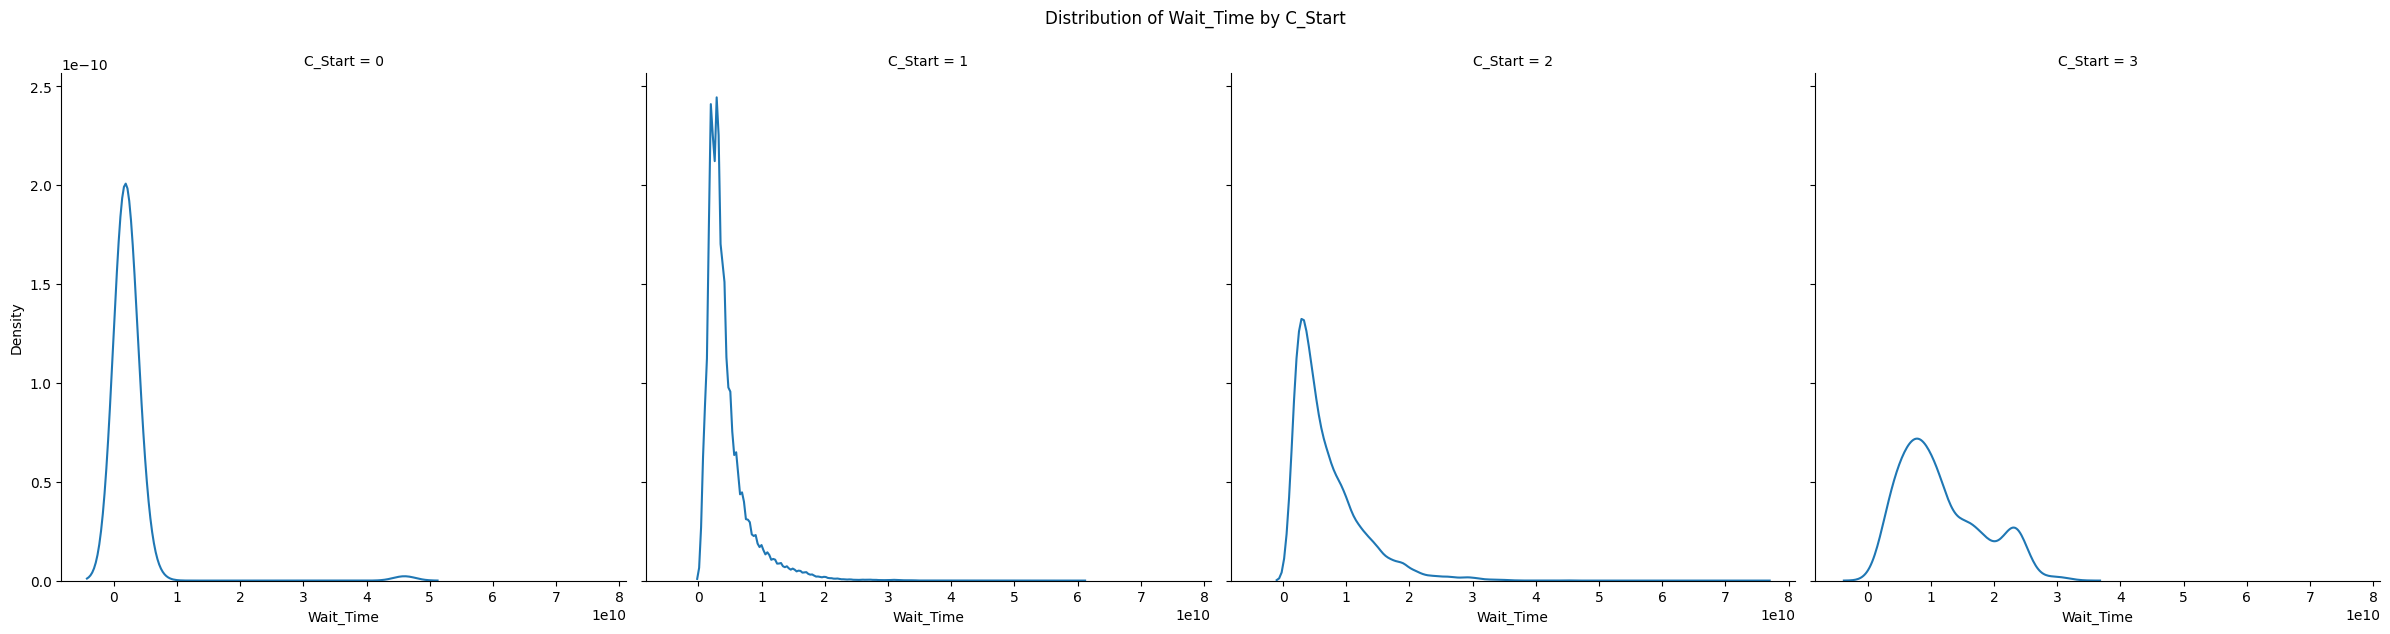

In [13]:
# Convert C_Start to numeric, setting errors='coerce' will turn non-numeric values to NaN
df['C_Start'] = pd.to_numeric(df['C_Start'], errors='coerce')

# Option 1: Drop rows with NaN in C_Start (you can also choose to fill NaNs if needed)
df = df.dropna(subset=['C_Start'])

# Ensure C_Start is treated as an integer if it's categorical
df['Wait_Time'] = df['Wait_Time'].astype(int)

# Convert C_Start to numeric, setting errors='coerce' will turn non-numeric values to NaN
df['Wait_Time'] = pd.to_numeric(df['Wait_Time'], errors='coerce')

# Option 1: Drop rows with NaN in C_Start (you can also choose to fill NaNs if needed)
df = df.dropna(subset=['Wait_Time'])

# Ensure C_Start is treated as an integer if it's categorical
df['C_Start'] = df['C_Start'].astype(int)

vars = ['Wait_Time']
for var in vars:
    g = sns.FacetGrid(df, col="C_Start",height=6)
    g.map(sns.kdeplot, var)
    g.figure.suptitle(f"Distribution of {var} by C_Start", y=1.05)
    plt.show()

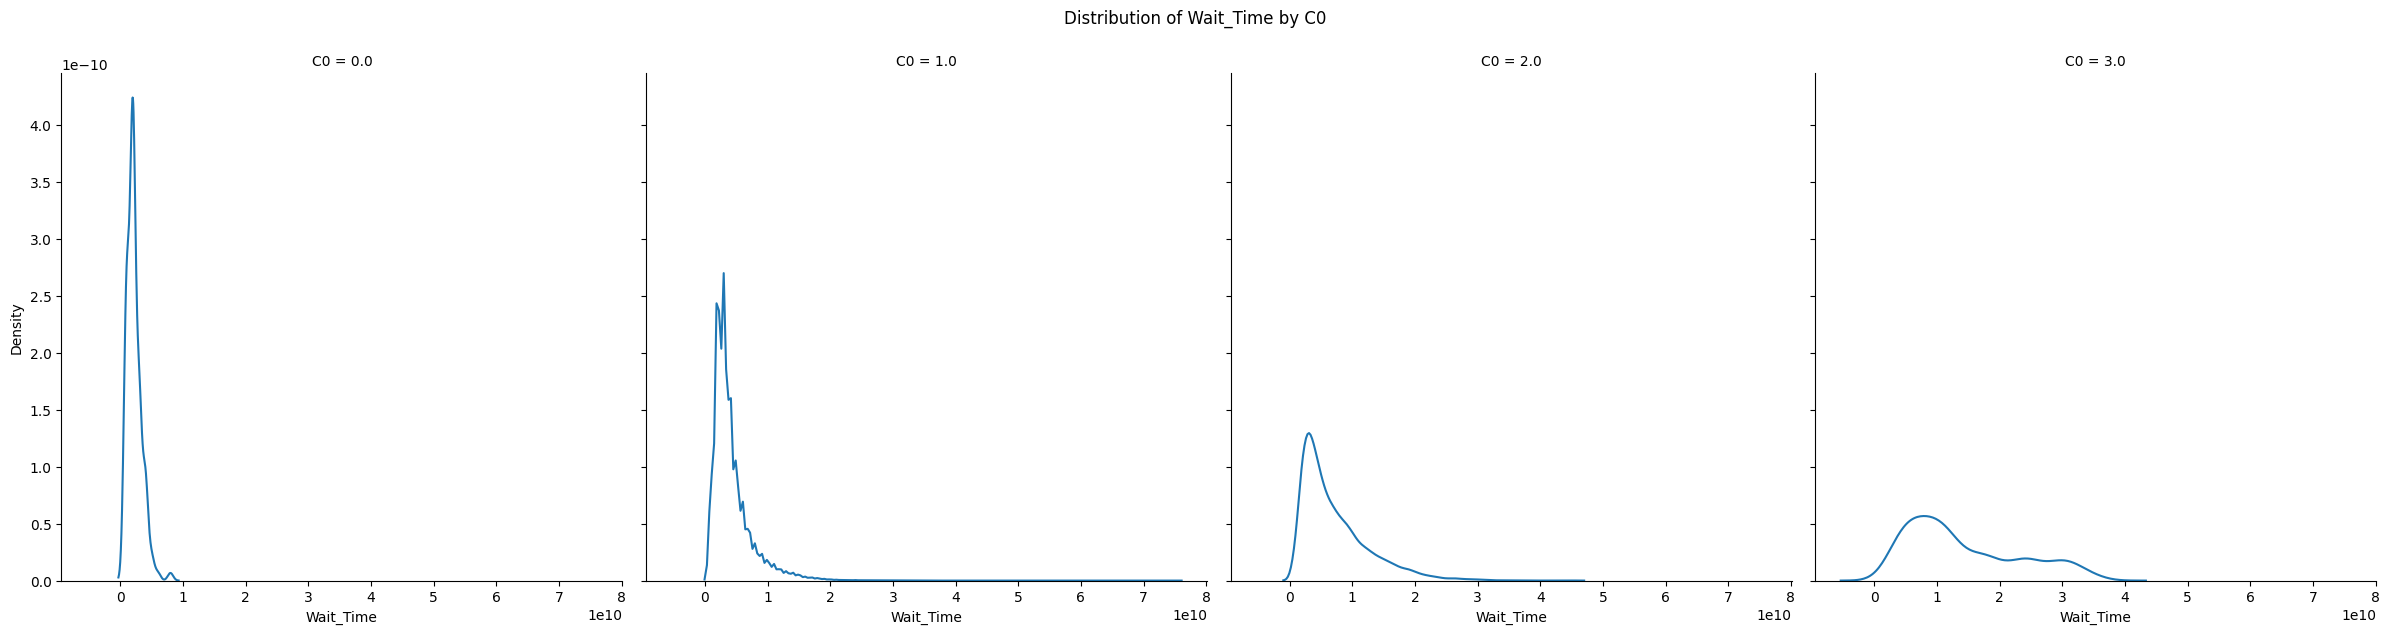

In [14]:
for var in vars:
    g = sns.FacetGrid(df, col="C0",height=6)
    g.map(sns.kdeplot, var)
    g.figure.suptitle(f"Distribution of {var} by C0", y=1.05)
    plt.show()

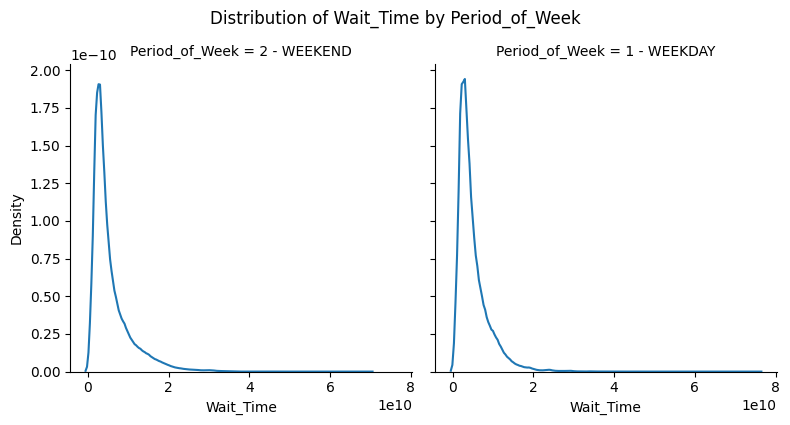

In [15]:
for var in vars:
    g = sns.FacetGrid(df, col="Period_of_Week",height=4)
    g.map(sns.kdeplot, var)
    g.figure.suptitle(f"Distribution of {var} by Period_of_Week", y=1.05)
    plt.show()

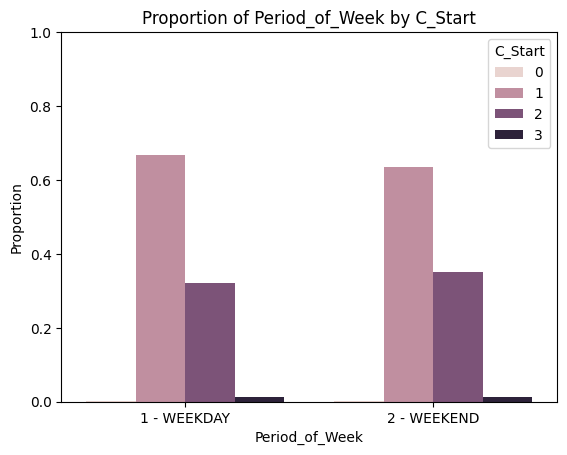

In [16]:
df_prop = (
    df.groupby('Period_of_Week')['C_Start']
    .value_counts(normalize=True)
    .rename("Proportion")
    .reset_index()
)

sns.barplot(x='Period_of_Week', y='Proportion', hue='C_Start', data=df_prop)
plt.title("Proportion of Period_of_Week by C_Start")
plt.xlabel("Period_of_Week")
plt.ylabel("Proportion")
plt.legend(title="C_Start")
plt.ylim(0, 1)
plt.show()

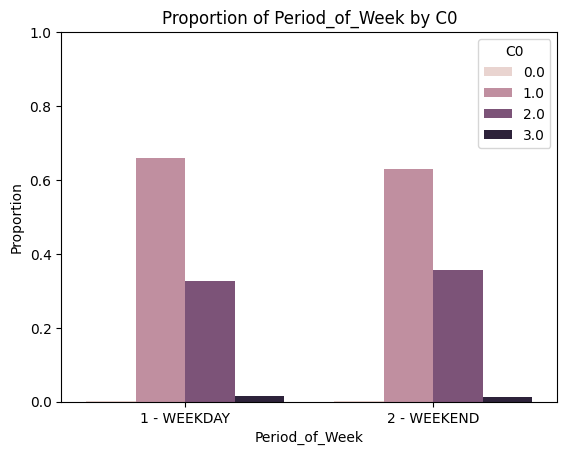

In [17]:
df_prop = (
    df.groupby('Period_of_Week')['C0']
    .value_counts(normalize=True)
    .rename("Proportion")
    .reset_index()
)

sns.barplot(x='Period_of_Week', y='Proportion', hue='C0', data=df_prop)
plt.title("Proportion of Period_of_Week by C0")
plt.xlabel("Period_of_Week")
plt.ylabel("Proportion")
plt.legend(title="C0")
plt.ylim(0, 1)
plt.show()

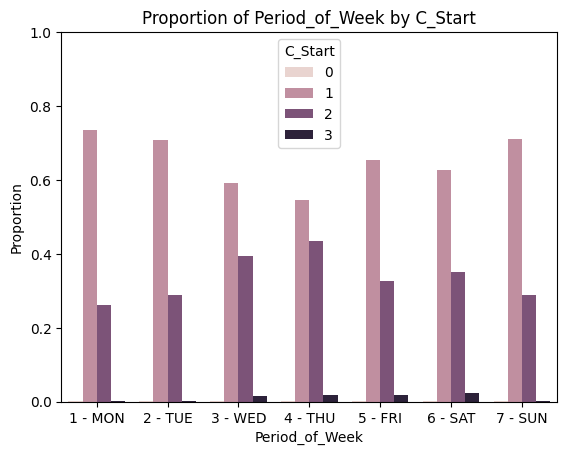

In [18]:
df_prop = (
    df.groupby('Day_of_Week')['C_Start']
    .value_counts(normalize=True)
    .rename("Proportion")
    .reset_index()
)

sns.barplot(x='Day_of_Week', y='Proportion', hue='C_Start', data=df_prop)
plt.title("Proportion of Period_of_Week by C_Start")
plt.xlabel("Period_of_Week")
plt.ylabel("Proportion")
plt.legend(title="C_Start")
plt.ylim(0, 1)
plt.show()

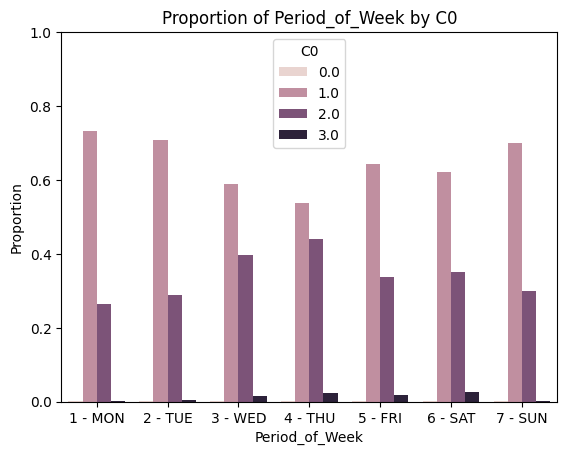

In [20]:
df_prop = (
    df.groupby('Day_of_Week')['C0']
    .value_counts(normalize=True)
    .rename("Proportion")
    .reset_index()
)

sns.barplot(x='Day_of_Week', y='Proportion', hue='C0', data=df_prop)
plt.title("Proportion of Period_of_Week by C0")
plt.xlabel("Period_of_Week")
plt.ylabel("Proportion")
plt.legend(title="C0")
plt.ylim(0, 1)
plt.show()

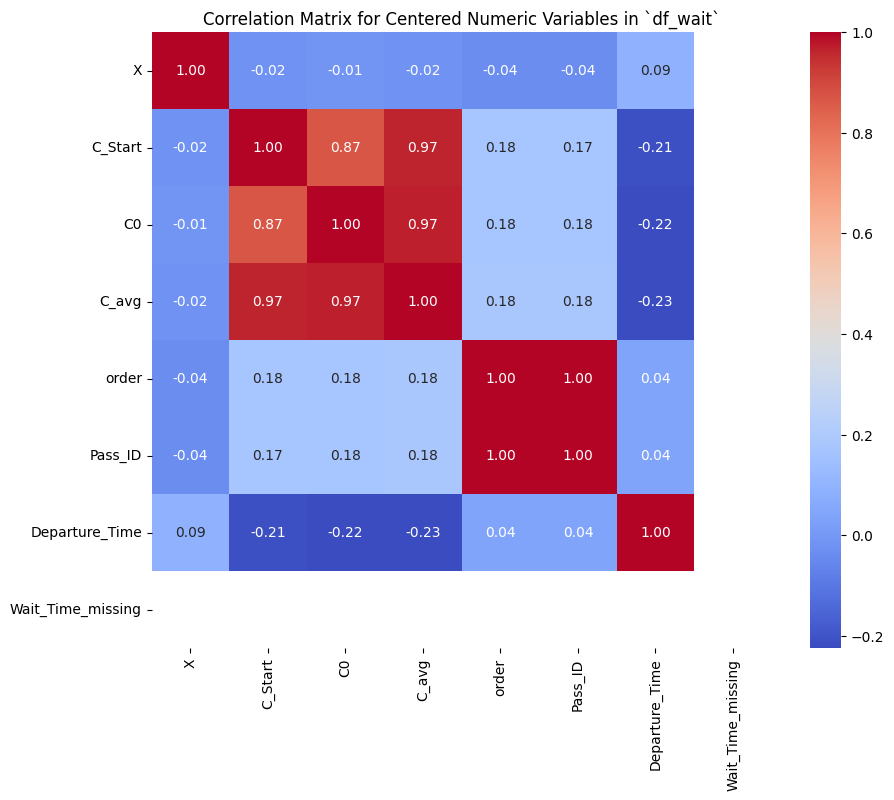

In [21]:
df_wait = df

df_wait['Wait_Time_missing'] = df_wait['Wait_Time'].isnull().astype(int)
df_wait = df_wait.select_dtypes(include='number').apply(lambda x: x - x.mean())
df_wait.drop(columns=["Wait_Time","Year"],inplace=True)

correlations = df_wait.corr()['Wait_Time_missing'].drop('Wait_Time_missing').sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(df_wait.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix for Centered Numeric Variables in `df_wait`")
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

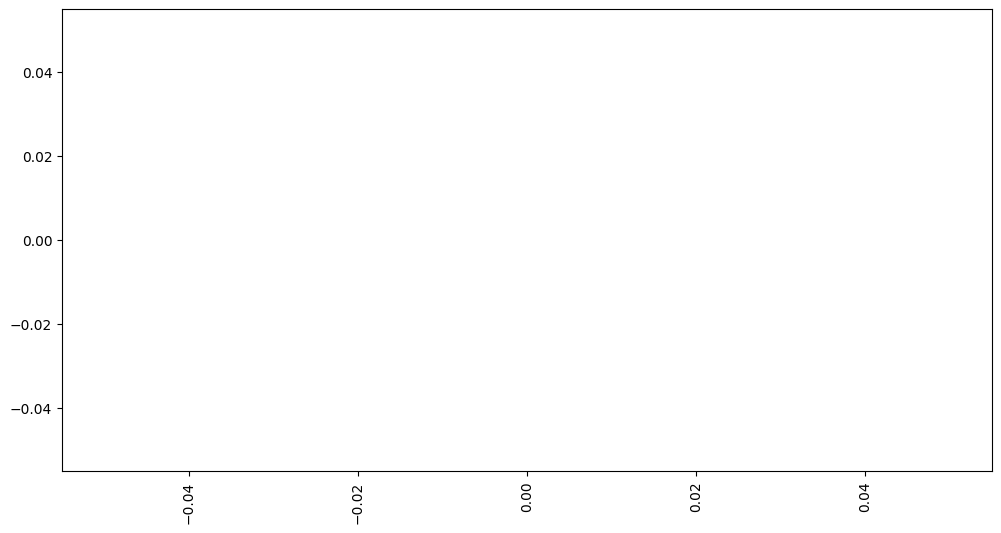

In [22]:
df_na_time_day = df[df['Wait_Time'].isnull()]['Time_of_Day'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
df_na_time_day.plot(kind='bar')
plt.title("Number of Missing 'Wait_Time' Values by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of NA Values")
plt.xticks(rotation=45)
plt.show()